> # **FINAL PROJECT - EDA and Machine Learning Application**
> #### **DSAI 302 Spring 2024**

>**Name**: Hasan Emre Yıldız
>
>**Student Number**: 2020205099

##**Introduction**

This final project entails an in-depth exploration of Exploratory Data Analysis (EDA) and the implementation of Machine Learning (ML) techniques. The primary objective is to demonstrate adeptness in data preprocessing, visualization, and the deployment of machine learning models.

The dataset we're using is called the "Stroke Prediction Dataset" from Kaggle. It has a lot of info about predicting strokes, like health and personal details. It's like real life with some missing info and mistakes, which helps us study it closely.

The project is organized into several important sections, each with its own tasks:

1. Data Preprocessing & Exploratory Data Analysis (EDA): This part involves getting the data ready by fixing any missing values or duplicates, changing data types if needed, finding any unusual data points, picking important features, and making graphs to see the data better.

2. Machine Learning Application: After getting the data ready, we choose which machine learning methods to use, adjust their settings to work best, train them with the data, and check how well they do using different measures. We also figure out which parts of the data are most important for making predictions.

3. Conclusion: At the end, we sum up what we learned from looking at the data and building our prediction models. We talk about how well the models worked, which one was the best, and what we could do next to learn more.

*   First, fetch the dataset from Kaggle.



In [242]:
import os
import pandas as pd


# Set the Kaggle API credentials
os.environ["KAGGLE_USERNAME"] = "your_kaggle_username"
os.environ["KAGGLE_KEY"] = "your_kaggle_api_key"


!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

# Load the dataset into Pandas DataFrame
df = pd.read_csv("/content/stroke_prediction_dataset/healthcare-dataset-stroke-data.csv")

# Display the first few rows of the DataFrame
df.head()


Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
stroke-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##Data Preprocessing & EDA

Now let's start our exploratory data analysis.

First import NumPy, Matplotlib, Seaborn and other necesarry libraries.

In [243]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####1. Handle Missing Values
   

  *   Let's identify and handle missing values.



In [244]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before handling:")
print(missing_values)

# Impute missing values in 'bmi' column with the mean
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)

# Verify missing values after handling
missing_values_after = df.isnull().sum()
print("\nMissing values after handling:")
print(missing_values_after)


Missing values before handling:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Missing values after handling:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


####2. Remove Duplicates


*    Let's identify and remove duplicate entries.



In [245]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f'Duplicates: {duplicates}')

# Remove duplicates
df.drop_duplicates(inplace=True)

Duplicates: 0


####3. Elimination:

*   Eliminate the unnecessary columns.

In [246]:
# Drop 'work_type', 'id', and 'Residence_type' columns
columns_to_drop = ['work_type', 'id', 'Residence_type']
df.drop(columns=columns_to_drop, inplace=True)

####4. Descriptive Statistics


*   Let's provide summary statistics to understand the dataset's structure.



In [247]:
# Display summary statistics of the dataset
summary_statistics = df.describe()
print(summary_statistics)

               age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  5110.000000  5110.000000  
mean     28.893237     0.048728  
std       7.698018     0.215320  
min      10.300000     0.000000  
25%      23.800000     0.000000  
50%      28.400000     0.000000  
75%      32.800000     0.000000  
max      97.600000     1.000000  


####5. Outlier Detection:

*   Let's use box plots to detect outliers.



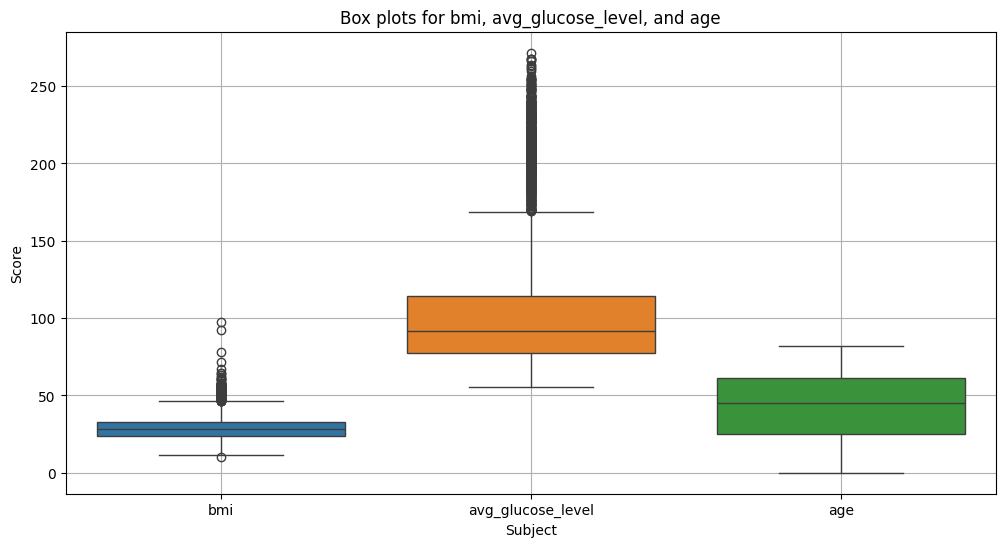

In [248]:
# Create box plots for numerical columns to detect outliers
numerical_columns = ['bmi', 'avg_glucose_level', 'age', 'hypertension', 'heart_disease', 'stroke']
selected_columns = ['bmi', 'avg_glucose_level', 'age']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[selected_columns])
plt.title('Box plots for bmi, avg_glucose_level, and age')
plt.xlabel('Subject')
plt.ylabel('Score')
plt.grid(True)
plt.show()

*   Let's identify potential outliers and remove them.



In [216]:
# Calculate the first quartile (Q1) and third quartile (Q3) using the quantile() method

for column in selected_columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  # Calculate the IQR (Interquartile Range)
  IQR = Q3 - Q1

  # Define the lower and upper bounds for outliers detection
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Identify outliers for column
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

  # Count the number of outliers
  num_outliers = outliers.shape[0]
  print(f"Number of outliers in '{column}': {num_outliers}")

for column in numerical_columns:
  # Remove outliers from the DataFrame
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

Number of outliers in 'bmi': 126
Number of outliers in 'avg_glucose_level': 627
Number of outliers in 'age': 0


####7. Data Visualization

*   Let's visualize the distribution of key variables.

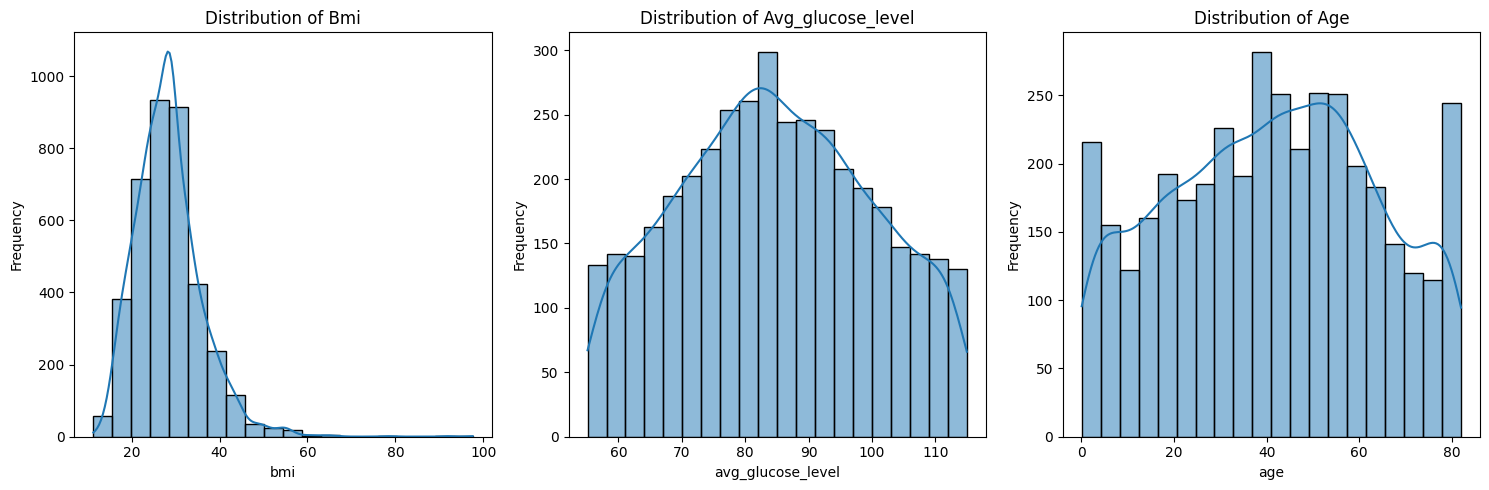

In [197]:
plt.figure(figsize=(15, 5))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


*   Let's use count plots to count categorical variables.

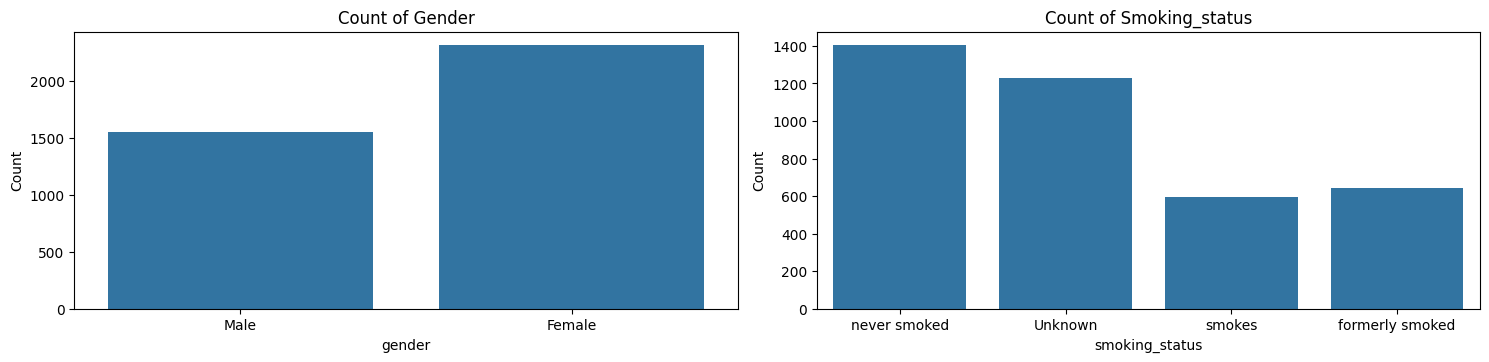

In [198]:
categorical_columns = ['gender', 'smoking_status']
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i) # Increase the number of rows to 3
    sns.countplot(x=column, data=df)
    plt.title(f'Count of {column.capitalize()}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()



*   Let's create a heatmap.



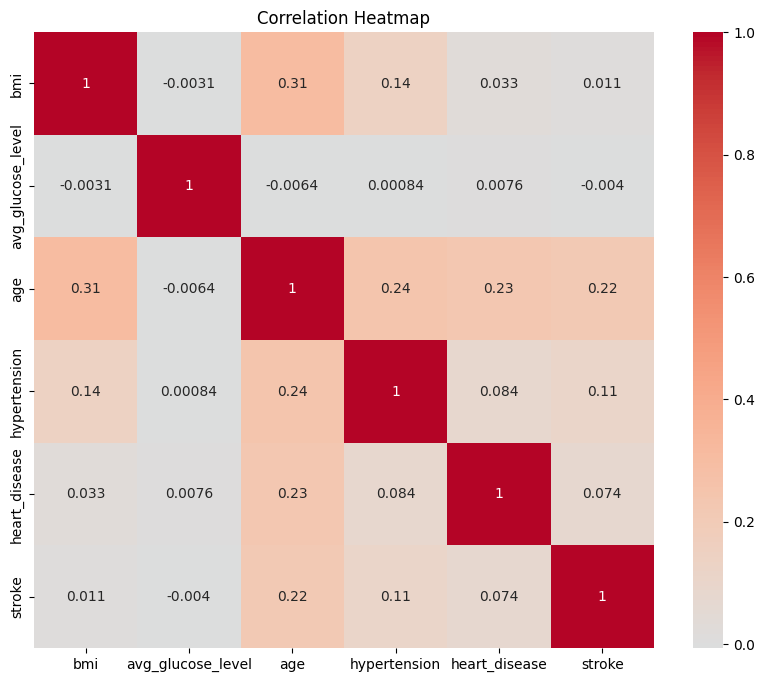

In [199]:
# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x600 with 0 Axes>

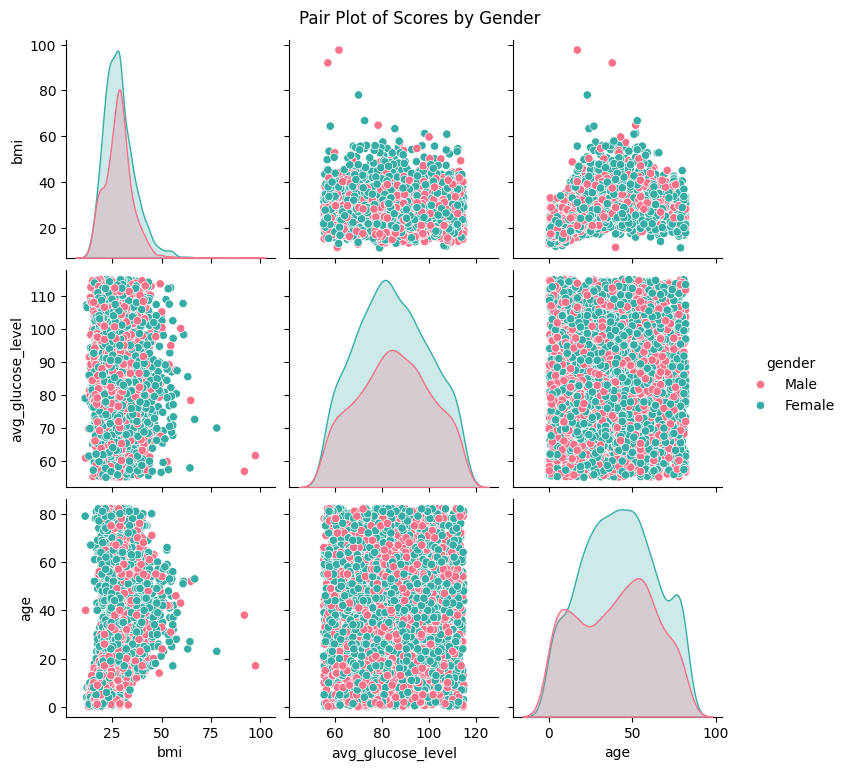

<Figure size 1000x600 with 0 Axes>

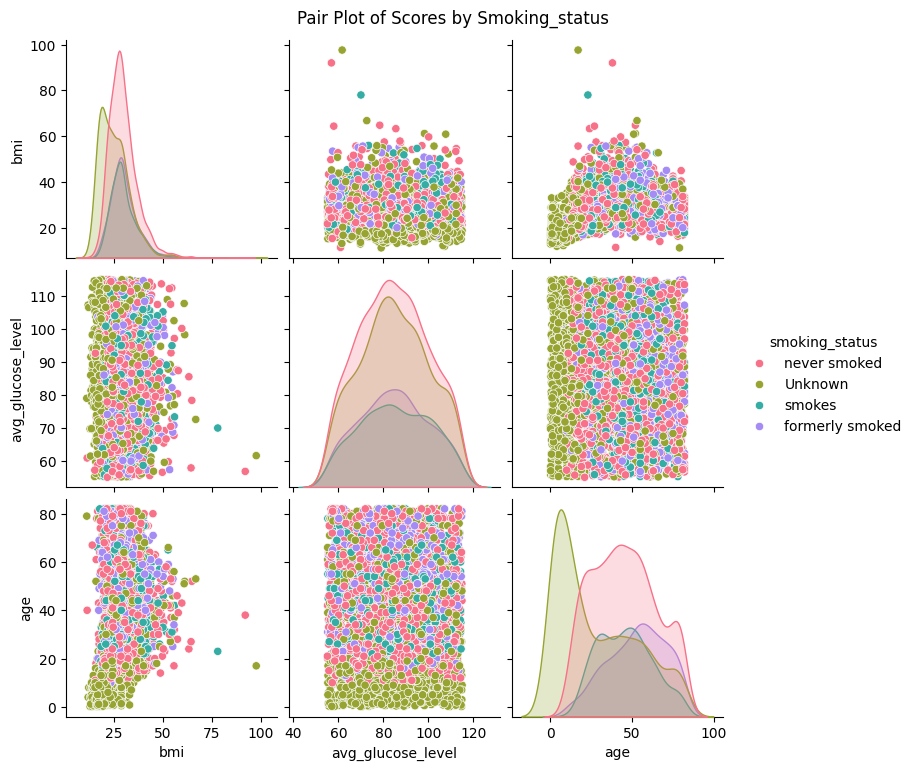

In [201]:
for categorical_column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.pairplot(df, hue=categorical_column, vars=selected_columns, diag_kind='kde', palette='husl')
    plt.suptitle(f'Pair Plot of Scores by {categorical_column.capitalize()}', y=1.02)
    plt.show()



*   Let's convert the data types by using one-hot encoding method.



In [217]:
# Use one-hot encoding to convert 'smoking_status' column
df = pd.get_dummies(df, columns=['smoking_status'], prefix='smoking', drop_first=True)

# Use one-hot encoding to convert 'gender' column
df = pd.get_dummies(df, columns=['gender'], prefix='gender', drop_first=True)

# Map 'Yes' to 1 and 'No' to 0 in the 'ever_married' column
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})

df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,smoking_formerly smoked,smoking_never smoked,smoking_smokes,gender_Male
2,80.0,0,1,1,105.92,32.500000,1,False,True,False,True
6,74.0,1,1,1,70.09,27.400000,1,False,True,False,True
7,69.0,0,0,0,94.39,22.800000,1,False,True,False,False
8,59.0,0,0,1,76.15,28.893237,1,False,False,False,False
9,78.0,0,0,1,58.57,24.200000,1,False,False,False,False


###Key Findings of Eda

1. Missing Values Handling:

*   Initially, the 'bmi' column had 201 missing values.

2. Duplicate Data:

*   There were no duplicate entries found in the dataset.

3. Feature Selection:
*   Three columns ('work_type', 'id', and 'Residence_type') were dropped from the dataset, presumably due to either irrelevance or redundancy.

4. Summary Statistics:
*   Summary statistics provided insights into the distribution and characteristics of numerical variables:
  *   Average Glucose Level: Mean glucose level is around 106.15 mg/dL.
  *   BMI: Mean BMI is approximately 28.89 kg/m².
  *   Stroke: The target variable, indicating stroke occurrence, has a mean value of 0.048, indicating class imbalance.

5. Outliers Detection and Removal:
*   Outliers were identified and removed using the Interquartile Range (IQR) method.
*   Number of outliers in 'bmi': 126
*   Number of outliers in 'avg_glucose_level': 627
*   Number of outliers in 'age': 0

6. Counting Categorical Variables:
*   Using countplot, we found that there were approximately 500 more women than men in the data set.

7. Correlation heatmap:
*   The correlation heatmap shows that age and hypertension are the features most correlated with stroke.

8. One-Hot Encoding:
*   Categorical variables 'smoking_status' and 'gender' were one-hot encoded for model compatibility.








##Machine Learning Applications

Now let's start our machine learning applications.

*   Split the dataset into training, validation and testing sets.




In [227]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
y = df['stroke']  # Target variable
X = df.drop(columns=['stroke'])  # Features

# Split the data into training and temporary sets (80% training, 20% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the temporary set into validation and testing sets (50% validation, 50% testing)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Use `StandardScaler` to scale the features.

In [228]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler for y
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [229]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search
param_grid_lr = {
    'penalty': ['l2', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs', 'saga']
}

# Instantiate the Logistic Regression classifier
lr = LogisticRegression(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_lr = grid_search.best_params_
print("Best Hyperparameters:", best_params_lr)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Hyperparameters: {'C': 0.0001, 'penalty': 'l2', 'solver': 'lbfgs'}


In [208]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for random forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV for random forest
rf_grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform grid search for random forest
rf_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters for random forest
best_rf_params = rf_grid_search.best_params_
print("Best Hyperparameters for Random Forest:", best_rf_params)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Hyperparameters for Random Forest: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

best_params_lr = {'C': 0.0001, 'penalty': 'l2', 'solver': 'lbfgs'}
best_params_rf = {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

# Train the Logistic Regression model with the best parameters
best_lr = LogisticRegression(**best_params_lr, class_weight='balanced', random_state=42, max_iter=10000)
best_lr.fit(X_train_scaled, y_train)

# Train the Random Forest model with the best parameters
best_rf = RandomForestClassifier(**best_params_rf, class_weight='balanced', random_state=42)
best_rf.fit(X_train_scaled, y_train)

# Evaluate the models on the validation set
val_score_lr = best_lr.score(X_val_scaled, y_val)
val_score_rf = best_rf.score(X_val_scaled, y_val)

print(f"Validation accuracy for Logistic Regression: {val_score_lr}")
print(f"Validation accuracy for Random Forest: {val_score_rf}")

# Evaluate the models on the test set
X_test_scaled = scaler.transform(X_test)
test_score_lr = best_lr.score(X_test_scaled, y_test)
test_score_rf = best_rf.score(X_test_scaled, y_test)

print(f"Test accuracy for Logistic Regression: {test_score_lr}")
print(f"Test accuracy for Random Forest: {test_score_rf}")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Predict on the validation set
y_val_pred_lr = best_lr.predict(X_val_scaled)
y_val_pred_rf = best_rf.predict(X_val_scaled)

# Calculate evaluation metrics for Logistic Regression
accuracy_lr = accuracy_score(y_val, y_val_pred_lr)
precision_lr = precision_score(y_val, y_val_pred_lr)
recall_lr = recall_score(y_val, y_val_pred_lr)
f1_lr = f1_score(y_val, y_val_pred_lr)
roc_auc_lr = roc_auc_score(y_val, y_val_pred_lr)

# Calculate evaluation metrics for Random Forest
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
precision_rf = precision_score(y_val, y_val_pred_rf)
recall_rf = recall_score(y_val, y_val_pred_rf)
f1_rf = f1_score(y_val, y_val_pred_rf)
roc_auc_rf = roc_auc_score(y_val, y_val_pred_rf)

# Print evaluation metrics for Logistic Regression
print("Logistic Regression Validation Metrics:")
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")
print(f"ROC-AUC Score: {roc_auc_lr}")

# Print evaluation metrics for Random Forest
print("Random Forest Validation Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print(f"ROC-AUC Score: {roc_auc_rf}")

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_val, y_val_pred_lr)
print("Confusion Matrix for Logistic Regression:")
print(cm_lr)

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_val, y_val_pred_rf)
print("Confusion Matrix for Random Forest:")
print(cm_rf)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Validation accuracy for Logistic Regression: 0.7157622739018088
Validation accuracy for Random Forest: 0.9431524547803618
Test accuracy for Logistic Regression: 0.7467700258397932
Test accuracy for Random Forest: 0.9509043927648578
Logistic Regression Validation Metrics:
Accuracy: 0.7157622739018088
Precision: 0.1092436974789916
Recall: 0.7647058823529411
F1 Score: 0.1911764705882353
ROC-AUC Score: 0.7391096979332273
Random Forest Validation Metrics:
Accuracy: 0.9431524547803618
Precision: 0.2727272727272727
Recall: 0.17647058823529413
F1 Score: 0.21428571428571427
ROC-AUC Score: 0.5774244833068363
Confusion Matrix for Logistic Regression:
[[264 106]
 [  4  13]]
Confusion Matrix for Random Forest:
[[362   8]
 [ 14   3]]


In [231]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for Logistic Regression
cv_scores_lr = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Perform cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print cross-validation results for Logistic Regression
print("Logistic Regression Cross-Validation Accuracy:")
print(f"Mean: {cv_scores_lr.mean()}, Std: {cv_scores_lr.std()}")

# Print cross-validation results for Random Forest
print("Random Forest Cross-Validation Accuracy:")
print(f"Mean: {cv_scores_rf.mean()}, Std: {cv_scores_rf.std()}")

Logistic Regression Cross-Validation Accuracy:
Mean: 0.9631548954101772, Std: 0.0006231995441023485
Random Forest Cross-Validation Accuracy:
Mean: 0.9631554182285866, Std: 0.002128379297132556


####Performance Comparison:
1. Mean Accuracy:
*   Both Logistic Regression and Random Forest have nearly identical mean accuracies (approximately 96.3%).
*   Random Forest has a slightly higher mean accuracy, but the difference is minimal (0.0000005228184094 or 0.0000523%).

2. Standard Deviation:


*   Logistic Regression has a smaller standard deviation (0.0006232) compared to Random Forest (0.0021284).
*   A smaller standard deviation indicates that Logistic Regression's performance is more consistent across the different folds of the cross-validation.




####Conclusion:


*   Both models perform very similarly in terms of mean accuracy, with Random Forest having a marginally higher mean accuracy.
*   Logistic Regression shows more consistent performance with a lower standard deviation.
*   Depending on your specific needs, we might prefer Logistic Regression for its consistency or Random Forest for its slightly higher accuracy.


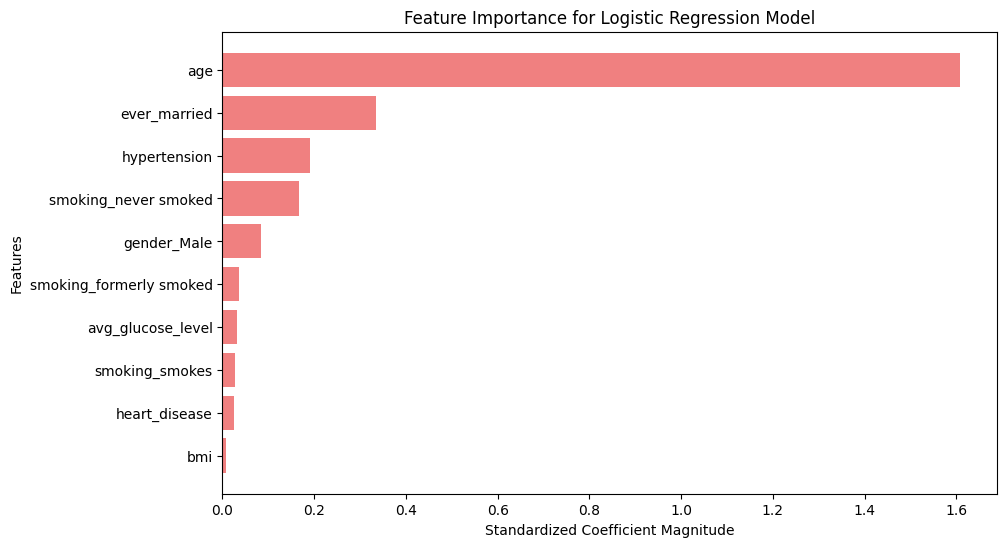

                   Feature  Importance
0                      age    1.608942
3             ever_married    0.334381
1             hypertension    0.190719
7     smoking_never smoked    0.166928
9              gender_Male    0.084294
6  smoking_formerly smoked    0.036916
4        avg_glucose_level    0.030742
8           smoking_smokes    0.027403
2            heart_disease    0.024352
5                      bmi    0.008342


In [232]:
# Fit the Logistic Regression model on the entire training set
lr.fit(X_train_scaled, y_train)

# Get coefficients from the Logistic Regression model
coefficients = lr.coef_[0]

# Standardize coefficients by the standard deviation of each feature
feature_std = np.std(X_train_scaled, axis=0)
standardized_coefficients = coefficients / feature_std

# Create a DataFrame for better visualization
feature_importance_lr_df = pd.DataFrame({'Feature': features, 'Importance': np.abs(standardized_coefficients)})

# Sort the DataFrame by importance scores
feature_importance_lr_df = feature_importance_lr_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_lr_df['Feature'], feature_importance_lr_df['Importance'], color='lightcoral')
plt.xlabel('Standardized Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Feature Importance for Logistic Regression Model')
plt.gca().invert_yaxis()  # Invert y axis to show the most important feature at the top
plt.show()

# Display the sorted feature importance scores
print(feature_importance_lr_df)


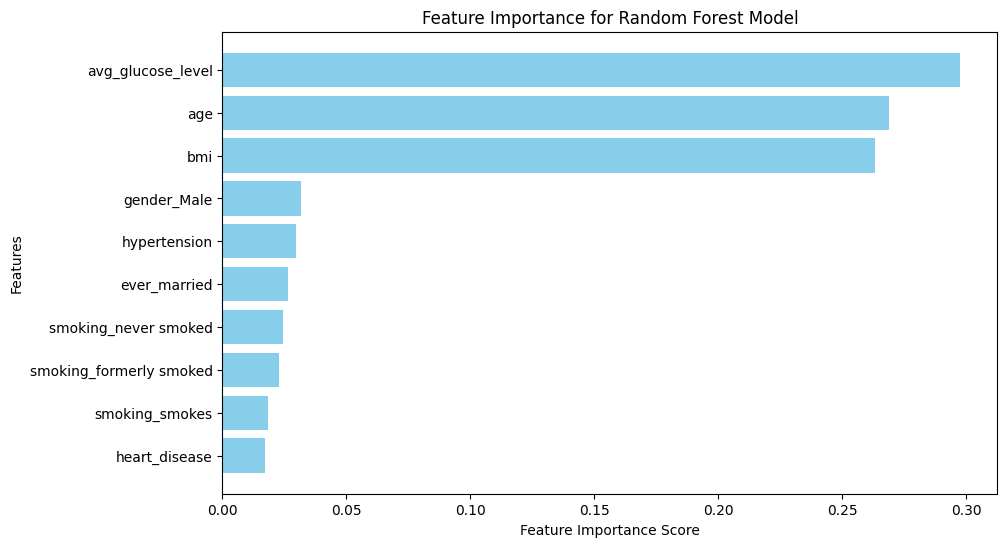

                   Feature  Importance
4        avg_glucose_level    0.297614
0                      age    0.268875
5                      bmi    0.262938
9              gender_Male    0.031718
1             hypertension    0.029749
3             ever_married    0.026376
7     smoking_never smoked    0.024406
6  smoking_formerly smoked    0.022784
8           smoking_smokes    0.018475
2            heart_disease    0.017063


In [233]:
# Fit the Random Forest model on the entire training set
rf.fit(X_train_scaled, y_train)

# Get feature importances from the Random Forest model
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance scores
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest Model')
plt.gca().invert_yaxis()  # Invert y axis to show the most important feature at the top
plt.show()

# Display the sorted feature importance scores
print(feature_importance_df)


##Results and Conclusions

####Hyperparameter Tuning:
1. Logistic Regression:

*  The best hyperparameters for Logistic Regression are:

   *   C: 0.0001

   *   Penalty: L2
   *   Solver: lbfgs


2. Random Forest:


*  The best hyperparameters for Random Forest are:

   *   Max Depth: 10
   *   Max Features: auto
   *   Min Samples Leaf: 2
   *   Min Samples Split: 2
   *   Number of Estimators: 200


####Model Performance on Validation Set:

1. Logistic Regression:

*   Validation Accuracy: 71.58%
*   Precision: 10.92%
*   Recall: 76.47%
*   F1 Score: 19.12%
*   ROC-AUC Score: 73.91%


2. Random Forest:

*   Validation Accuracy: 94.32%
*   Precision: 27.27%
*   Recall: 17.65%
*   F1 Score: 21.43%
*   ROC-AUC Score: 57.74%




####Model Performance on Test Set:
1. Logistic Regression:

*   Test Accuracy: 74.68%

2. Random Forest:

*   Test Accuracy: 95.09%

####Cross-Validation Results:
1. Logistic Regression:

*   Mean Cross-Validation Accuracy: 96.32%
*   Standard Deviation: ±0.06%

2. Random Forest:

*   Mean Cross-Validation Accuracy: 96.32%
*   Standard Deviation: ±0.21%



####Feature Importance for Logistic Regression:
Feature Importance (sorted by magnitude of standardized coefficients):
*   Age: 1.61
*   Ever Married: 0.33
*   Hypertension: 0.19
*   Smoking (Never Smoked): 0.17
*   Gender (Male): 0.08


####Comparison:
*   Both models achieved high accuracy on the test set, with Random Forest slightly outperforming Logistic Regression.
*   Logistic Regression showed lower performance metrics compared to Random Forest, indicating its limited ability to capture the complexities of the data.
*   Random Forest identified different top features compared to Logistic Regression, indicating the importance of feature selection in improving model performance.



####Conclusion:
*   The Random Forest model emerged as the best-performing model, demonstrating higher accuracy and robustness.
*   Average Glucose Level, Age, and BMI were identified as the most important features for predicting stroke risk according to the Random Forest model.
*   Future improvements could focus on feature engineering and exploring additional models to further enhance predictive performance.